In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.special import softmax
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

Loading the dataset

In [2]:
iris = load_iris()

In [3]:
features = iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
petals = iris.data[:, 2:4]
sepals = iris.data[:, :2]
alliris = iris.data

Splitting the data into 10% test and 90%train

In [5]:
X_train_petals, X_test_petals, _, _ = train_test_split(petals, iris.target, test_size=0.1, random_state=42)
X_train_sepals, X_test_sepals, _, _ = train_test_split(sepals, iris.target, test_size=0.1, random_state=42)
X_train_alliris, X_test_alliris, y_train, y_test = train_test_split(alliris, iris.target, test_size=0.1, random_state=42)


Logistic Regression Class Implementation

In [6]:
class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.biases = None
        self.weights_history = []

    def gradient_descent(self, X, y, max_epochs=100, learning_rate=0.1):
        one_hot_encoder = OneHotEncoder()
    
        self.one_hot_encoder = one_hot_encoder.fit_transform(y.reshape(-1, 1))
        self.weights = np.zeros((X.shape[1], self.one_hot_encoder.shape[1]))
        self.biases = 0
        for _ in range(max_epochs):
            logits = np.dot(X, self.weights) + self.biases
            predictions = softmax(logits, axis=1)
            weight_gradients = (1 / X.shape[0]) * (np.dot(X.T, (predictions - self.one_hot_encoder))) + 2 * 0.1 * self.weights
            bias_gradients = (1 / X.shape[0]) * np.sum(predictions - self.one_hot_encoder, axis=0) + 2 * 0.1 * self.biases
            self.weights -= learning_rate * weight_gradients
            self.biases -= learning_rate * bias_gradients
            self.weights_history.append(self.weights.copy())
        return self.weights, self.biases

    def fit(self, X, y):
        self.weights, self.biases = self.gradient_descent(X, y)

    def predict(self, X):
        logits = np.dot(X, self.weights) + self.biases
        predictions = softmax(logits, axis=1)
        predicted_classes = np.argmax(predictions, axis=1)
        return predicted_classes


Model 1 with Petal length vs Petal width

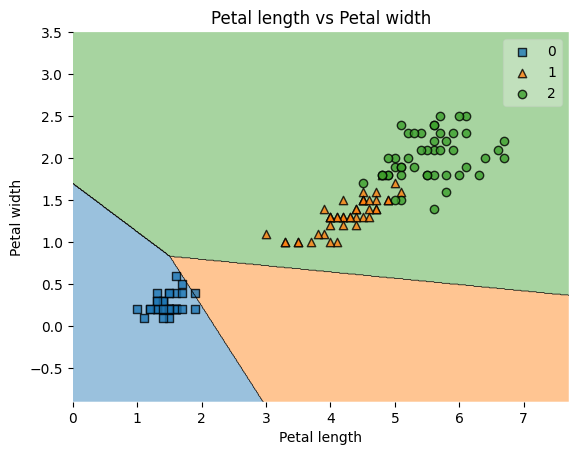

Accuracy for petals:  0.6


In [7]:
model1 = LogisticRegression()
model1.fit(X_train_petals, y_train)
plot_decision_regions(X_train_petals, y_train, clf=model1)
plt.title('Petal length vs Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()
pred1 = model1.predict(X_test_petals)
accuracy1 = accuracy_score(y_test, pred1)
print("Accuracy for petals: " ,accuracy1)

Model 2 with Sepal length vs Sepal width

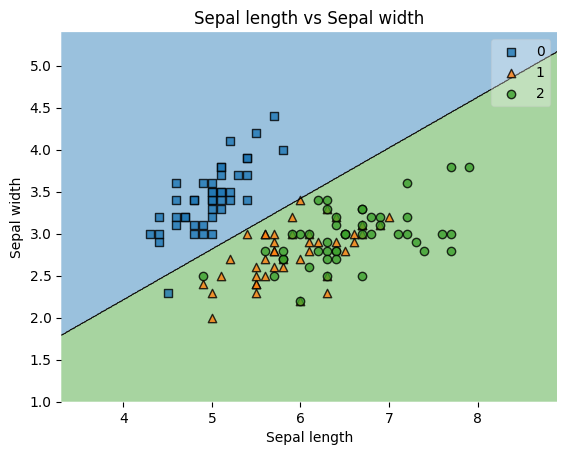

Accuracy for sepals:  0.6


In [8]:
model2 = LogisticRegression()
model2.fit(X_train_sepals, y_train)
plot_decision_regions(X_train_sepals, y_train, clf=model2)
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
pred2 = model2.predict(X_test_sepals)
accuracy2 = accuracy_score(y_test, pred2)
print("Accuracy for sepals: " ,accuracy2)

Model 3 with all features

In [9]:
model3 = LogisticRegression()
model3.fit(X_train_alliris, y_train)
pred3 = model3.predict(X_test_alliris)
accuracy3 = accuracy_score(y_test, pred3)

print("Accuracy for all features: " ,accuracy3)

Accuracy for all features:  0.8
